In [132]:
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np
from Analisis_Predictivo import Analisis_Predictivo
import os
os.chdir("/home/william/Desktop")

In [133]:
potabilidad = pd.read_csv("potabilidad_V2.csv")
potabilidad = potabilidad.iloc[:,1:]
potabilidad["Potability"] = potabilidad["Potability"].astype('category')

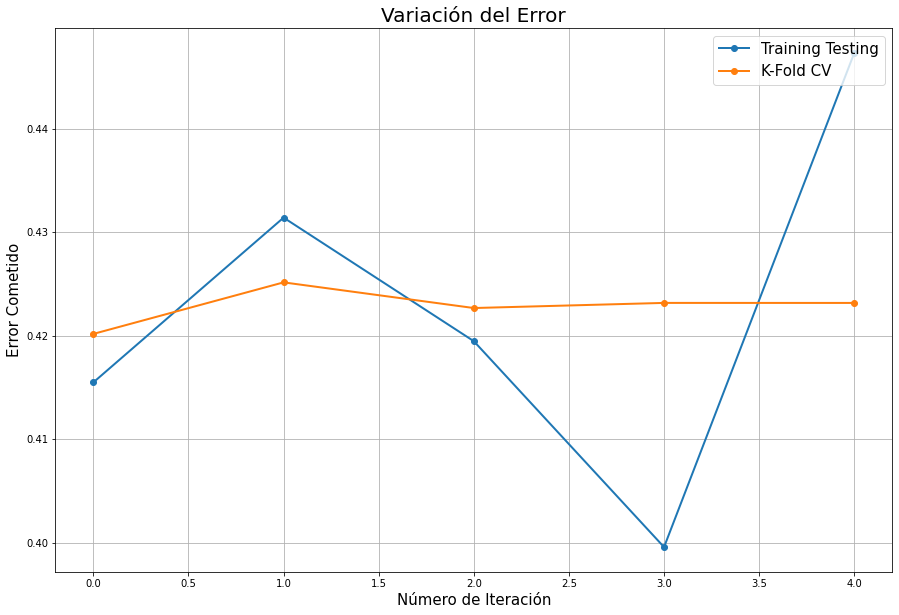

In [134]:
kne =  KNeighborsClassifier(n_neighbors=50, algorithm="auto")
analisisKne = Analisis_Predictivo(potabilidad,predecir= "Potability",modelo=kne,
                                       train_size= 0.75)
analisisKne.graficar_validacion_error_validacion_kfold_vs_testing(5)

El error de cometido de cross-validation es mucho más constante, que el error de training testing, yo considero esto positivo porque básicamente es más confiable a la hora de evaluar un modelo de machine learning.

In [135]:
entropyTree =  DecisionTreeClassifier(criterion="entropy")
giniTree =  DecisionTreeClassifier(criterion="gini")

In [136]:
instancia_kfold = KFold(n_splits=10,shuffle=True)
porcentajes = cross_val_score(entropyTree,
                              analisisKne.x, analisisKne.y, cv=instancia_kfold)
porcentaje_entropy = porcentajes.mean()

In [137]:
instancia_kfold = KFold(n_splits=10,shuffle=True)
porcentajes = cross_val_score(giniTree,
                              analisisKne.x, analisisKne.y, cv=instancia_kfold)
porcentaje_gini = porcentajes.mean()

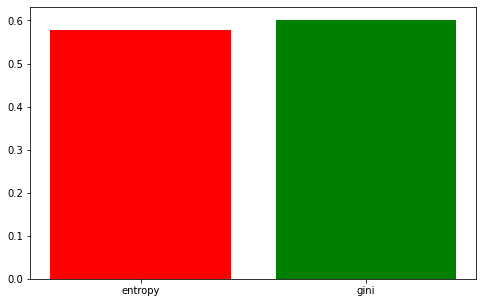

In [138]:
plt.figure(figsize=(8,5))
alto = [porcentaje_entropy,porcentaje_gini]
barras = ('entropy','gini')
y_pos = np.arange(len(barras))
plt.bar(y_pos, alto, color=['red', 'green'])
plt.xticks(y_pos, barras)
plt.show()

In [139]:
kne5 =  KNeighborsClassifier(n_neighbors=5, algorithm="auto")
kne30 =  KNeighborsClassifier(n_neighbors=30, algorithm="auto")
kne60 =  KNeighborsClassifier(n_neighbors=60, algorithm="auto")

instancia_kfold = KFold(n_splits=10, shuffle=True)
porcentajes = cross_val_score(kne5,
                              analisisKne.x, analisisKne.y, cv=instancia_kfold)
porcentaje5 = porcentajes.mean()

instancia_kfold = KFold(n_splits=10, shuffle=True)
porcentajes = cross_val_score(kne30,
                              analisisKne.x, analisisKne.y, cv=instancia_kfold)
porcentaje30 = porcentajes.mean()

instancia_kfold = KFold(n_splits=10, shuffle=True)
porcentajes = cross_val_score(kne60,
                              analisisKne.x, analisisKne.y, cv=instancia_kfold)
porcentaje60 = porcentajes.mean()

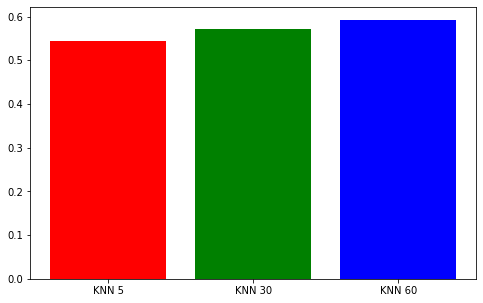

In [140]:
plt.figure(figsize=(8,5))
alto = [porcentaje5,porcentaje30, porcentaje60]
barras = ('KNN 5','KNN 30','KNN 60')
y_pos = np.arange(len(barras))
plt.bar(y_pos, alto, color=['red', 'green', 'blue'])
plt.xticks(y_pos, barras)
plt.show()

Los 60 cluster son la mejor forma de predecir, el color azul

